# The Mystery of Set 18

### The Problem

On the Cartier Gulf Ecosystem Survey (CAR-2022-025), Set #18 is missing all the fish data. We have records for the fishing and oceanographic events however it appears that specimens were never entered into this set in Andes.

This document will examine so of the data and metadata collected during that period in order to help elucidate the cause behind the lost set.

For a bird's eye view of the events, let's look at a gantt chart of Sets 14-31

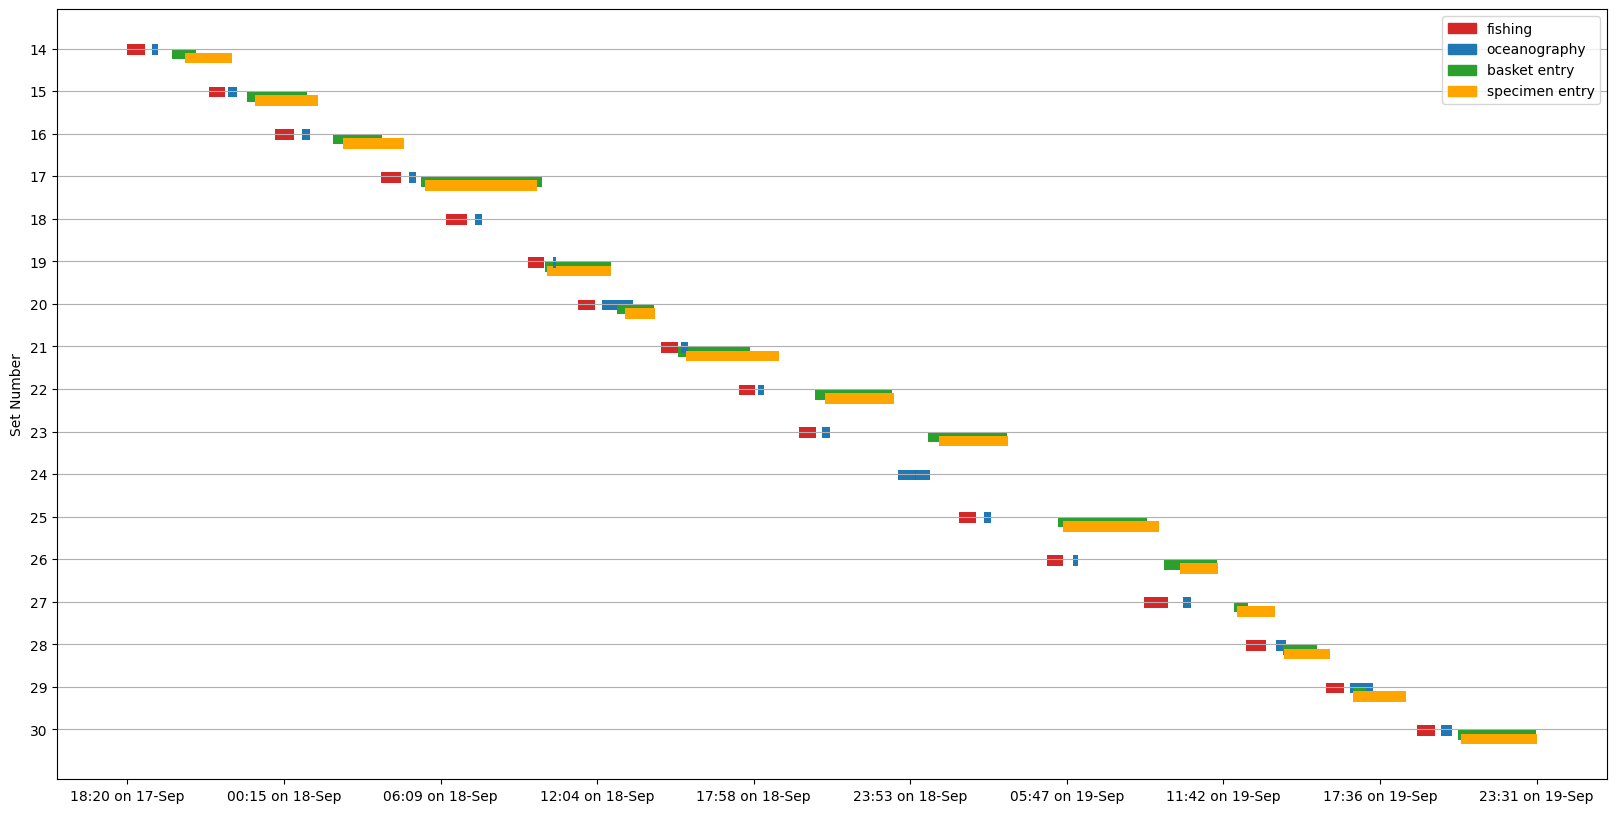

In [1]:
import datetime as dt
import statistics
import warnings

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Read Data from timeline
timeline_df = pd.read_pickle('pickles/CAR/timeline.pkl')
# Make a few annotations and modifications to the df
timeline_df['duration'] = timeline_df.end - timeline_df.start
timeline_df.duration = timeline_df.duration.apply(lambda x: x.days + (x.seconds / 60 / 60 / 24))
# sort in ascending order of start date
timeline_df = timeline_df.sort_values(by='start', ascending=True)
# add color
c_dict = {'fishing': 'tab:red', 'oceanography': 'tab:blue', 'basket entry': 'tab:green', "specimen entry": "orange"}
timeline_df['color'] = timeline_df.type.apply(lambda x: c_dict[x])
timeline_df['set'] = timeline_df.set_number.apply(lambda x: int(x))

# create a subset
subdf = timeline_df.loc[(timeline_df['set'] >= 14) & (timeline_df['set'] <= 30),].copy()
# project level variables
p_start = subdf.start.min()
p_end = subdf.end.max()
td = p_end - p_start
p_duration = td.days + (td.seconds / 60 / 60 / 24)
# Add relative date
subdf['rel_start'] = subdf.start.apply(lambda x: (x - p_start).days + ((x - p_start).seconds) / 60 / 60 / 24)

# Create custom x-ticks and x-tick labels
x_ticks = np.linspace(start=0, stop=p_duration, num=10)
x_labels = [(p_start + dt.timedelta(days=i)).strftime('%H:%M on %d-%b')
            for i in x_ticks]

# ######  PLOTTING GANTT CHART ######
offset_dict = {'fishing': -0.1, 'oceanography': -0.1, 'basket entry': 0, "specimen entry": 0.1}
fig, ax = plt.subplots(figsize=(20, 10))
for index, row in subdf.iterrows():
    ax.broken_barh([(row.rel_start, row.duration)], (row["set"] + offset_dict[row["type"]], 0.25), facecolors=c_dict[row["type"]])

plt.grid(axis='y')
ax.set_ylabel('Set Number')
ax.set_yticks(range(subdf.set.min(), subdf.set.max() + 1))  # Modify y-axis tick labels
ax.set_xticks(ticks=x_ticks, labels=x_labels)
plt.gca().invert_yaxis()

handles = list()
for c in c_dict:
    handles.append(mpatches.Patch(color=c_dict[c], label=c))
ax.legend(handles=handles)

plt.show()

Another way we can look at this is a flattened view

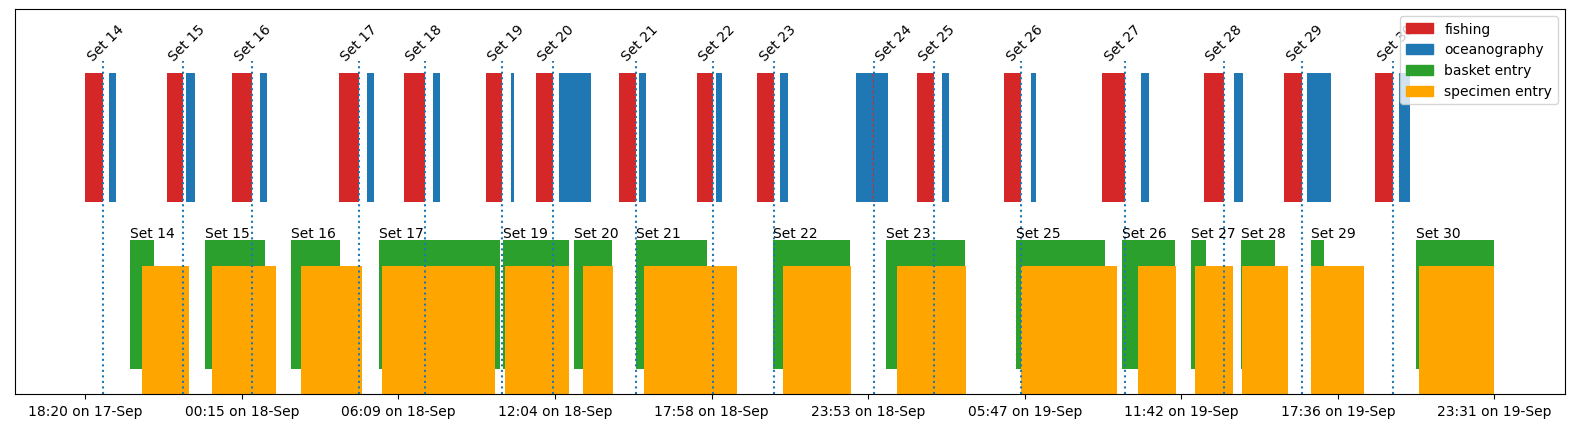

In [2]:

# create a subset
subdf = timeline_df.loc[(timeline_df['set'] >= 14) & (timeline_df['set'] <= 30),].copy()
# project level variables
p_start = subdf.start.min()
p_end = subdf.end.max()
td = p_end - p_start
p_duration = td.days + (td.seconds / 60 / 60 / 24)
# Add relative date
subdf['rel_start'] = subdf.start.apply(lambda x: (x - p_start).days + ((x - p_start).seconds) / 60 / 60 / 24)

# Create custom x-ticks and x-tick labels
x_ticks = np.linspace(start=0, stop=p_duration, num=10)
x_labels = [(p_start + dt.timedelta(days=i)).strftime('%H:%M on %d-%b')
            for i in x_ticks]

# ######  PLOTTING GANTT CHART ######
offset_dict = {'fishing': 0, 'oceanography': 0, 'basket entry': 0.1, "specimen entry": 0}
fig, ax = plt.subplots(figsize=(20, 5))
for index, row in subdf.iterrows():
    if row["type"] in ["fishing", "oceanography"]:
        ax.broken_barh([(row.rel_start, row.duration)], (.75 + offset_dict[row["type"]], 0.5), facecolors=c_dict[row["type"]])
        if row["type"] in ["fishing"]:
            ax.stem([row.rel_start + row.duration], [1.3], linefmt=":", markerfmt="")
            ax.annotate(f'Set {row["set"]}', (row.rel_start, 1.3), rotation=45, color="black")
    else:
        ax.broken_barh([(row.rel_start, row.duration)], (0 + offset_dict[row["type"]], 0.5), facecolors=c_dict[row["type"]])
        if "basket" in row["type"]:
            ax.annotate(f'Set {row["set"]}', (row.rel_start, 0.61), rotation=0, color="black")

plt.grid(axis='y')
ax.set_yticks([])  # Modify y-axis tick labels
ax.set_xticks(ticks=x_ticks, labels=x_labels)
ax.set(ylim=(0, 1.5))

handles = list()
for c in c_dict:
    handles.append(mpatches.Patch(color=c_dict[c], label=c))
ax.legend(handles=handles)

plt.show()

There are a few things to note in the above figure:

- Set 18 is missing basket and specimen entry
- Starting on Set 17, the wetlab on the Cartier got backed up. The hoppers were emptied until Set 28, more than a day later. Given that, the proximity between the fishing (red) and the basket entry (green) does not make sense.
- Set 24 was an AZMP set, hence there were no baskets to enter. However, catches were entered into that set. The team was under the impression that it was the data from set 25 that was accidentally being entered into set 24. Accordingly, DJF reassigned all the catches from Set 24 to Set 25.

The possibility that the data was entered and subsequently deleted is very unlikely and there is no evidence to suggest this. As a part of this inquiry, the Andes backups for that day have been re-instantiated and at no points in the backups were fish measured into Set 18.

Is it possible specimens were measured and deleted in between backups? Yes, but it would be very unlikely. This would have to be done manually and to each catch in the set. Aside from deleting the entire set itself, there is no function in Andes for doing this.

Is is possible the entire set was deleted and subsequently recreated? No, because we still have all the set card data from the bridge and the Oceanographic data. Those data were collected upstream of any ecosystem survey data collection and the deletion of the entire set would have resulted in the loss of the upstream data.


A few hypotheses to consider:

1. ##### The "Open Set" Hypothesis

    The specimens from Set 18 were entered into Set 17. In this scenario, Set 17 would not have been deactivated and the tow from 18 would have been entered into Set 17.

    **PREDICTIONS:** If this were true, we would expect the histogram of *both basket and specimen creation timestamps to have a bimodal distribution*; with one peak corresponding to each tow. Under this hypothesis, we would also expect to have a greater number of baskets than usual since many of the same species would have been caught at both stations.

    **PROBLEMS** Intuitively, this scenario seems unlikely because it means that nobody in the lab clued in at any point that something was amiss. As the baskets were being entered, the staff members would have never noticed that baskets were being entered into catches that already contained baskets. If this was the team's first set, this becomes more feasible, especially if somebody inexperience was doing the actual data entry.

2. ##### The "Super Set" Hypothesis

    The specimens from Set 18 were accidentally processed along with another Set, i.e., the hopper containing catches for Set 17 would have been emptied onto the belt along with the specimens from another tow. The other tow would probably be a neighboring tow, but not necessarily.

    **PREDICTIONS:** If this were true, we would expect the histogram of *both basket and specimen creation timestamps to have a uni-modal distribution*; with a single peak.

    **PROBLEMS** If the science team took an extended break partway through this set, the uni-modal signal would be dampened and the pattern of data entry would be confounded with the first hypothesis. Also, the team seems very confident that the hoppers were managed correctly. The major problem with this hypothesis is its lack of diagnosability.

Unfortunately, the above hypotheses are not mutually exclusive. [ IS THIS TRUE? CAN THEY BOTH BE TRUE ]


The Open Set hypothesis would potentially result in an elevated number of baskets being entered. In a normal set, most catches have a single basket, but those in higher abundance will have more baskets. In the Open Set hypothesis, assuming a decent overlap in species composition of tows, we would expect a greater than normal number of catches with more than one basket. Let's take a look at three figures: 1) a barblot of the total number of baskets entered at each set 2) a barplot of the total biomass for each set and 3) a box-and-whisker-plot of the number of baskets per catch by set.

In [35]:
df = pd.read_pickle('pickles/CAR/baskets.pkl')

def set_changer(set_number):
    if set_number in range(19,24):
        return set_number-1
    return set_number


# create a set reference dictionary to find station and stratum from set
car_set_lookup = dict()
for index, row in df.iterrows():
    car_set_lookup[row['set']] = dict(station=row.stn.split("-")[0], stratum=row.stratum)


mod_car_set_lookup = dict()
for key in car_set_lookup:
    new_key = set_changer(key)
    if new_key == 18:
        mod_car_set_lookup[new_key] = dict(station="034", stratum="418")
    elif new_key in range(19, 24):
        mod_car_set_lookup[new_key] = car_set_lookup[key-1]
    else:
        mod_car_set_lookup[new_key] = car_set_lookup[key]



count_data = df["set"].value_counts()
df = pd.DataFrame({'set': count_data.index, 'count': count_data.values})

df['set_number'] = df.set.apply(lambda x: f"Set {int(x)}\n({car_set_lookup[x]['stratum']})")
df['color'] = df.set.apply(lambda x: "yellow" if x in [17, 19, 20, 21] else "tab:blue")
df = df.sort_values(by=["set"])

# count
fig, axs = plt.subplots(3, 1, figsize=(20, 25))
ax = axs[0]
ax.bar(df.set_number, df["count"], color=df["color"])
ax.set_ylabel('Count')
ax.set_xticklabels(df.set_number, rotation=45)
ax.set_title('Total Count of Baskets by Set')
ax.grid(axis='y')
ax.annotate(f'Mean = {round(statistics.mean(df["count"]), 2)}', (1, 80))
ax.annotate(f'Median = {round(statistics.median(df["count"]), 2)}', (1, 75))

# biomass
df = pd.read_pickle('pickles/CAR/baskets.pkl')
df = df.groupby("set").sum()
df['set_int'] = df.index
df['set_number'] = df.set_int.apply(lambda x: f"Set {int(x)}\n({car_set_lookup[x]['stratum']})")
df['color'] = df.set_int.apply(lambda x: "yellow" if x in [17, 19, 21] else "tab:blue")
df = df.sort_values(by=["set_int"])
ax = axs[1]
ax.bar(df.set_number, df["mass"], color=df["color"])
ax.set_ylabel('Biomass (kg)')
ax.set_xticklabels(df.set_number, rotation=45)
ax.set_title('Total Biomass by Set')
ax.grid(axis='y')
ax.annotate(f'Mean = {round(statistics.mean(df["mass"]), 2)}', (1, 1750))
ax.annotate(f'Median = {round(statistics.median(df["mass"]), 2)}', (1, 1500))

# boxplot of average number of baskets per catch
df = pd.read_pickle('pickles/CAR/species_basket_count.pkl')
sets = df["set"].unique()
data = list()
for s in sets:
    data.append(df.loc[(df["set"] == s),]["count"])

ax = axs[2]
bplot2 = ax.boxplot(data,
                    vert=True,  # vertical box alignment
                    patch_artist=True,  # fill with color
                    )  # will be used to label x-ticks
ax.set_title('Avg. Number of Baskets per Catch')
ax.grid(axis='y')
ax.set_ylabel('Baskets per catch')
# ax.set_xlabel('Sets')
set_labels = [f"Set {int(x)}" for x in sets]
ax.set_xticklabels(set_labels, rotation=45)
ax.grid(axis='y')
plt.show()


<IPython.core.display.Javascript object>

It can be observed from the first figure that Set 21 is the only set whose total number of baskets stands out. However, upon close inspection, there does not seem to be a problem as the number of baskets per catch is still, on average equal to one. The "Open Set" hypothesis should result in a higher than normal avg number of baskets per species for the reasons mentioned above.

So how do we account for the high number of baskets at Set 21? Let's look at a contingency table for that set:

In [4]:
df = pd.read_pickle('pickles/CAR/baskets.pkl')
# focus just on 21
df = df.loc[(df["set"] == 21), ["set", "species"]]
df = df.groupby("species").count()
df = df.sort_values("set", ascending=False)
df = df.rename(columns={"set": "basket count", })
# pd.set_option('display.max_rows', None)
print(df)
print("\nTOTAL", sum(df["basket count"]))

                                                    basket count
species                                                         
American lobster                                              18
Winter flounder                                                6
Sheep's Tongue Sponge, Furrowed Horny Sponge                   4
Mollusc unidentified empty                                     3
Sea Squirt unidentified (Ascidia sp.)                          3
Purple sunstar                                                 3
Yellowtail flounder                                            3
Iceland scallop                                                2
Common starfish                                                2
Sea potato                                                     2
Sea strawberry coral                                           2
American plaice                                                2
Daisy brittle star                                             2
Sea peach                

As per the predictions listed above, we can also take a look at the histograms for specimen data entry timestamps:

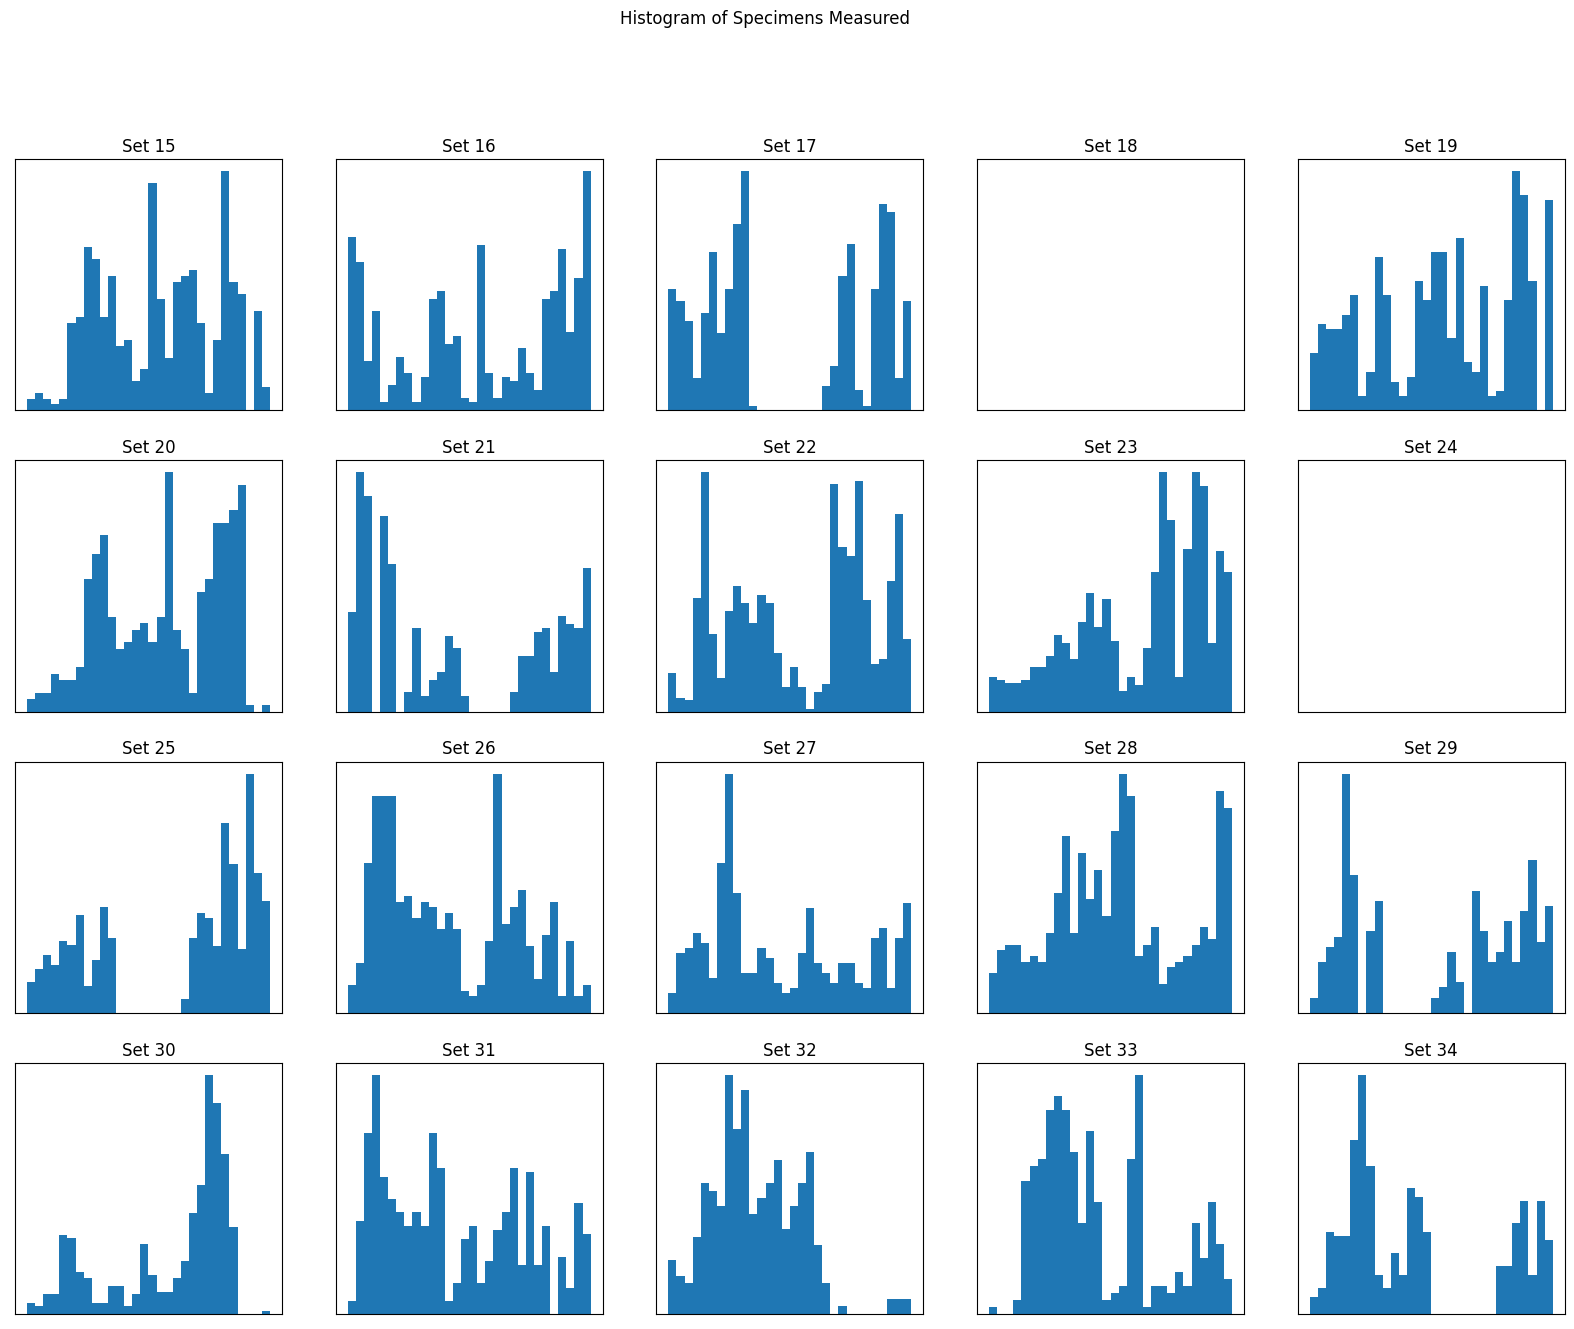

In [5]:
df = pd.read_pickle('pickles/CAR/specimens.pkl')
nrow = 4
ncol = 5
rows = range(0, nrow)
cols = range(0, ncol)
s = 15

fig, axs = plt.subplots(nrow, ncol, figsize=(20, 15))
for row in rows:
    for col in cols:
        ax = axs[row, col]
        ax.set_title(f'Set {s}')
        ax.hist(df.loc[(df["set"] == s), ["dt"]].dt, bins=30)
        s += 1

fig.suptitle('Histogram of Specimens Measured')

for ax in axs.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.label_outer()

plt.show()

A few of these have strong bimodal distributions, namely Sets 17, 21, 22 and 25. Let's take a closer look at these four:

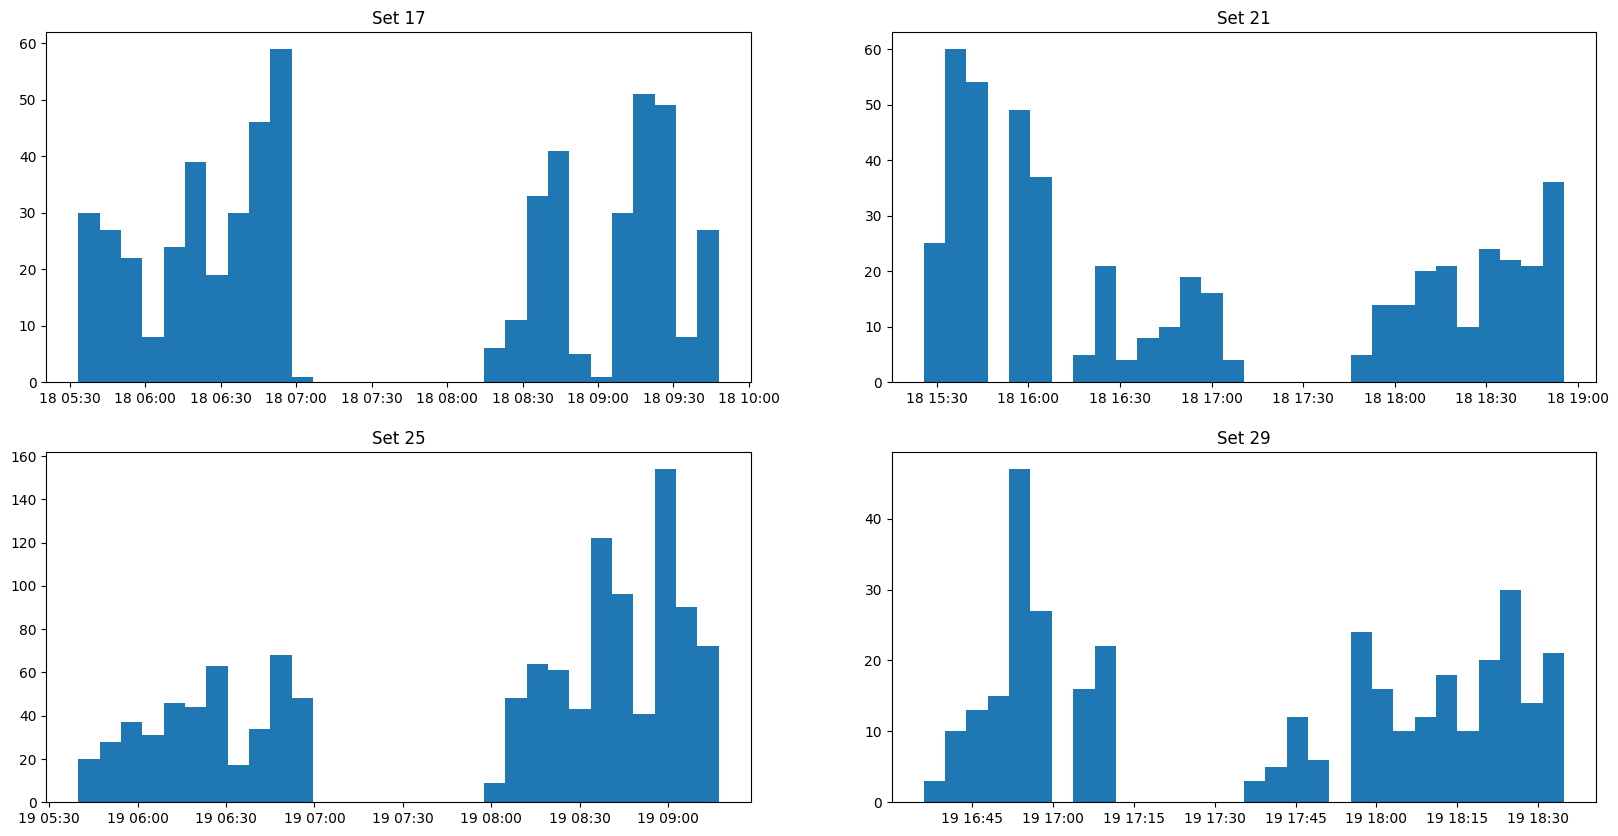

In [6]:
nrow = 2
ncol = 2
rows = range(0, nrow)
cols = range(0, ncol)
sets = 17, 21, 25, 29
i = 0
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 10))
for row in rows:
    for col in cols:
        ax = axs[row, col]
        ax.set_title(f'Set {sets[i]}')
        ax.hist(df.loc[(df["set"] == sets[i]),].dt, bins=30)
        i += 1
plt.show()

By looking at those four histograms in closer detail, we see that the breaks in data entry occur either between 7-8am or 17-18h, corresponding to breakfast and lunch, respectively. Finally, let's have a look at the histogram of basket entry to see if any of the above sets show a strong bimodal pattern of data entry:

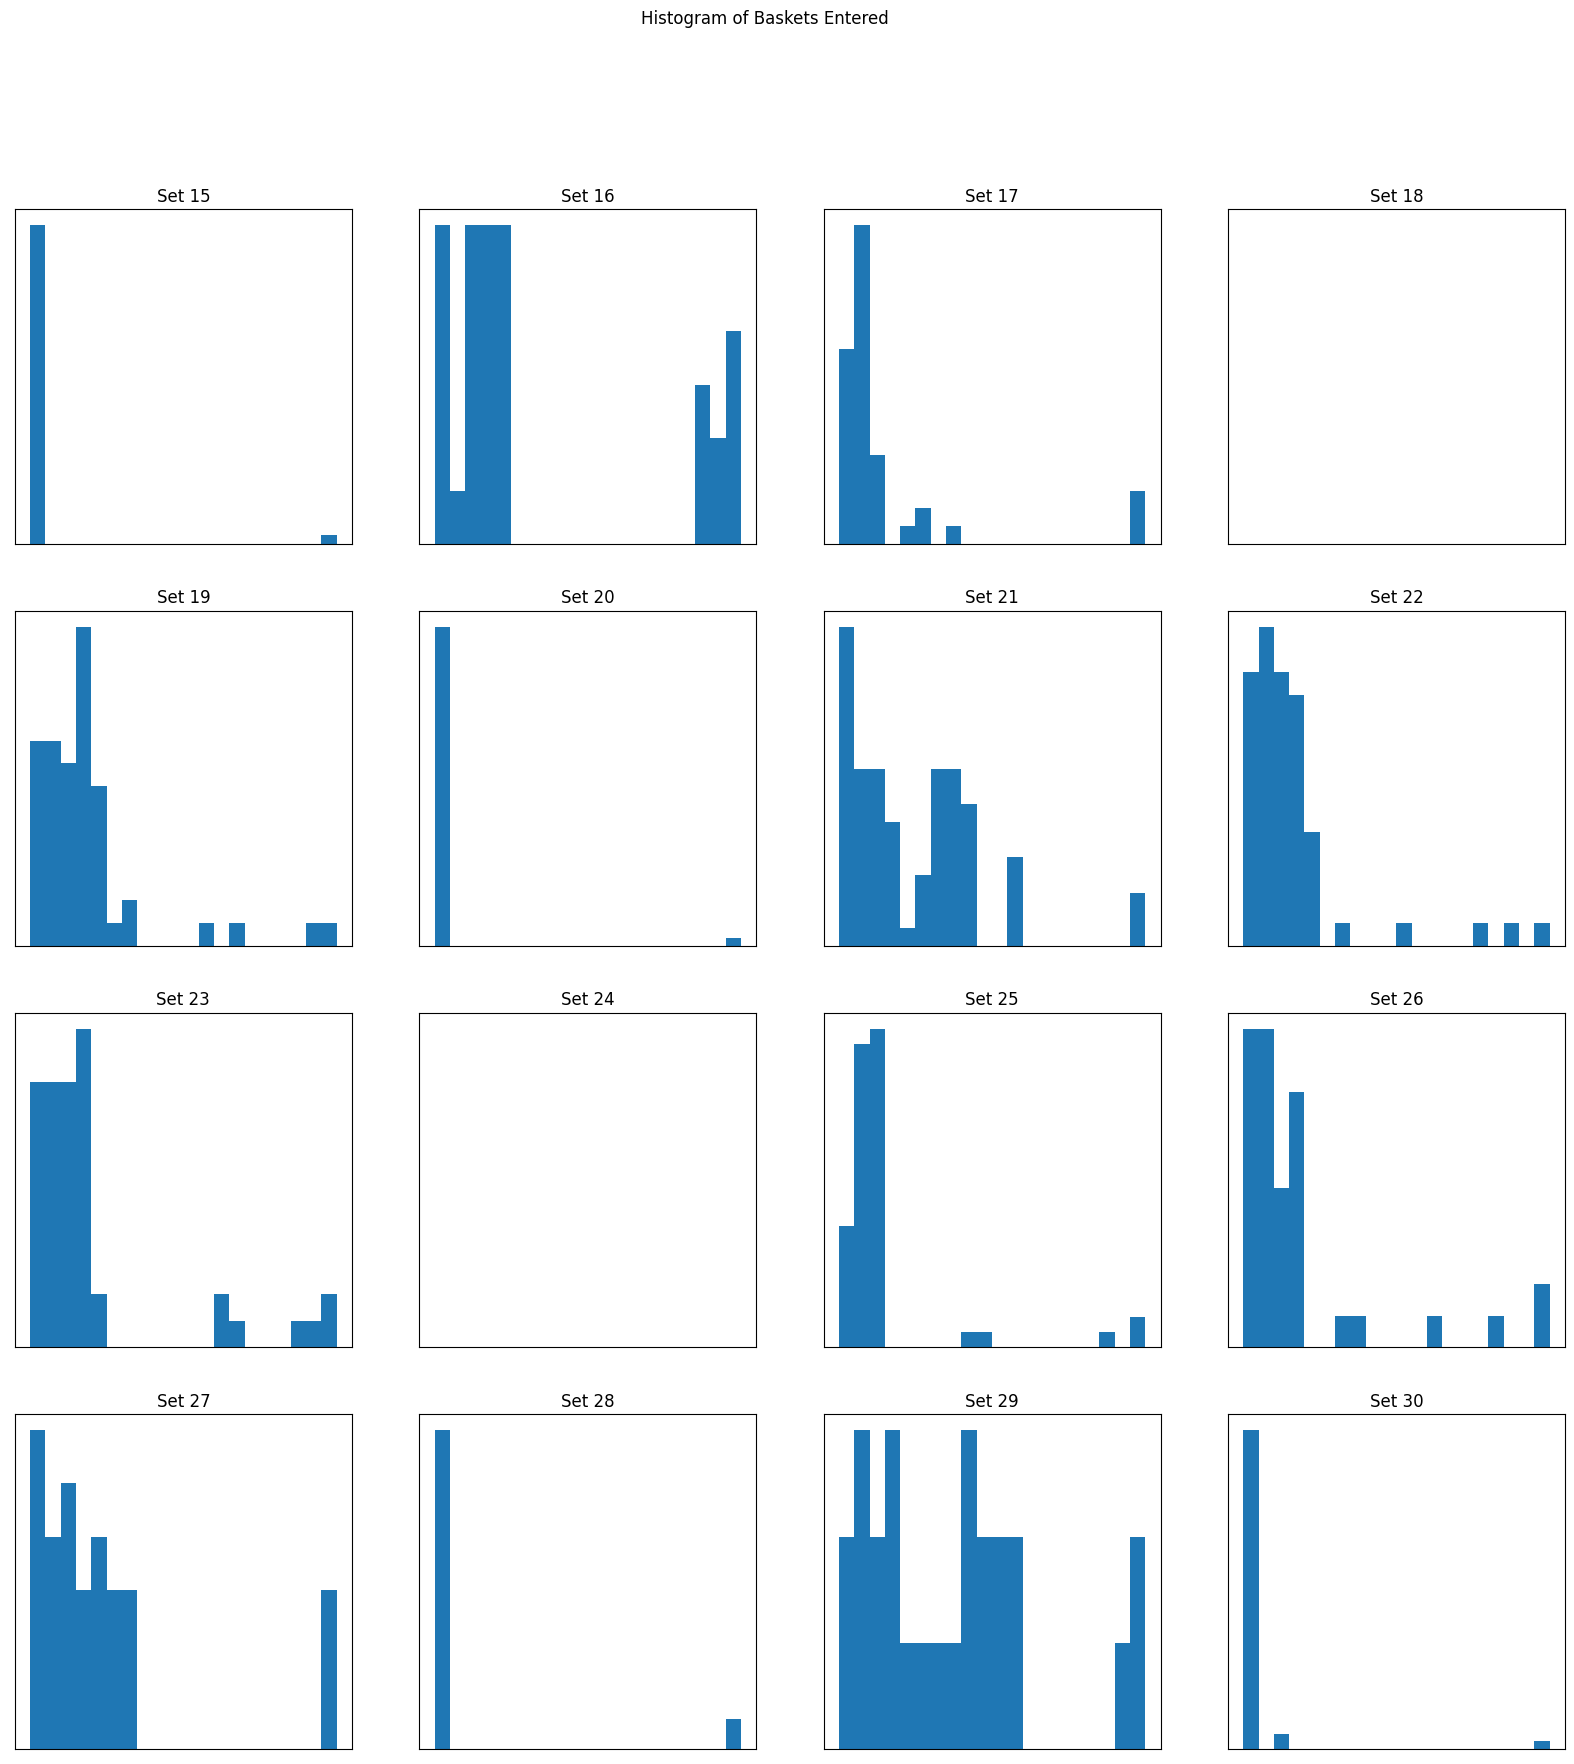

In [7]:
df = pd.read_pickle('pickles/CAR/baskets.pkl')
nrow = 4
ncol = 4
rows = range(0, nrow)
cols = range(0, ncol)
s = 15
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 20))
for row in rows:
    for col in cols:
        ax = axs[row, col]
        ax.set_title(f'Set {s}')
        ax.hist(df.loc[(df["set"] == s), ["dt"]].dt, bins=20)
        s += 1

fig.suptitle('Histogram of Baskets Entered')

for ax in axs.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.label_outer()

plt.show()

From the above figures, we can conclude that the "open-set" hypothesis is not likely. This means that Set 18 was most probably inadvertently combined with another Set. The candidate sets are ranging from Set 19 until Set 28, when the backlog was finally cleared. In order to help verify whether the catches entered at a given set are valid, we can look at species composition and make use of data from the comparative vessel.

In [8]:
import ecopy

# import teleost data
df_tel = pd.read_pickle('pickles/TEL/baskets.pkl')  # 177 species
# create a set reference dictionary to find station and stratum from set for TEL
tel_set_lookup = dict()
for index, row in df_tel.iterrows():
    tel_set_lookup[row['set']] = dict(station=row.stn.split("-")[0], stratum=row.stratum)

# maybe we can use an ordination plot..
# let's create a contingency table of set by species
df_car = pd.read_pickle('pickles/CAR/baskets.pkl')  # 177 species
df_car = df_car.loc[(df_car["set"] >= 15) & (df_car["set"] <= 33),]
df_car['set_label'] = df_car["set"].apply(lambda x: f"CAR set{int(x)}")

indicesToKeep = df_tel['set'].apply(lambda x: x in range(2, 20))  # sets on the teleost of interest range from 2 to 19
df_tel = df_tel.loc[indicesToKeep,]
df_tel['set_label'] = df_tel["set"].apply(lambda x: f"TEL set{int(x)}")
# df_tel['set_label'] = df_tel["set"].apply(lambda x: f"TEL set{int(x)}-stn{tel_set_lookup[x]['station']}-stratum{tel_set_lookup[x]['stratum']}")
result = df_car.append(df_tel)
df = pd.crosstab(result["set_label"], result["species"], values=result["mass"], aggfunc="sum")
df = df.fillna(0)
# Conduct a hellinger transformation of the matrix
x = ecopy.transform(df, method='hellinger')

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2', 'pc3'])

finalDf = principalDf.assign(set=df.index.to_list())
finalDf["vessel"] = finalDf["set"].apply(lambda x: "Teleost" if "TEL" in x else "Cartier")
finalDf["set"] = finalDf["set"].apply(lambda x: int(x.split("set")[-1]))
finalDf["station"] = finalDf["set"]
finalDf["stratum"] = finalDf["set"]
finalDf["label"] = finalDf["set"]
for index, row in finalDf.iterrows():
    lookup = tel_set_lookup if row.vessel == "Teleost" else car_set_lookup
    stn = lookup[row['set']]["station"]
    stratum = lookup[row['set']]["stratum"]
    finalDf.loc[index, "station"] = stn
    finalDf.loc[index, "stratum"] = stratum
    finalDf.loc[index, "label"] = f"Set{row['set']}/Stn{stn}/Strm{stratum}"

strata = finalDf.stratum.unique()

indicesToKeep = finalDf['vessel'].apply(lambda x: "tel" in x.lower())
finalDf_tel = finalDf.loc[indicesToKeep,]
indicesToKeep = finalDf['vessel'].apply(lambda x: "car" in x.lower())
finalDf_car = finalDf.loc[indicesToKeep,]


[0.31405298 0.23642454 0.0894722 ]


In [9]:

%matplotlib notebook

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

ax = axs[0]
ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 2', fontsize=15)
ax.set_title('PCA of Sets from Teleost and Cartier', fontsize=20)

ax.scatter(finalDf_tel['pc1'], finalDf_tel['pc2'], s=50, c="blue")
ax.scatter(finalDf_car['pc1'], finalDf_car['pc2'], s=50, c="red")

for index, row in finalDf.iterrows():
    ax.annotate(row.label, (row['pc1'], row['pc2'] + 0))
ax.grid()

ax = axs[1]
ax.set_xlabel('PC 1', fontsize=15)
ax.set_ylabel('PC 3', fontsize=15)
ax.set_title('PCA of Sets from Teleost and Cartier', fontsize=20)

ax.scatter(finalDf_tel['pc1'], finalDf_tel['pc3'], s=50, c="blue")
ax.scatter(finalDf_car['pc1'], finalDf_car['pc3'], s=50, c="red")

for index, row in finalDf.iterrows():
    ax.annotate(row.label, (row['pc1'], row['pc3'] + 0.015))
ax.grid()





<IPython.core.display.Javascript object>

In [22]:
# Lets create a quick script for comparing two stations
%matplotlib notebook
# x axis should be station
import seaborn as sns

# biomass
df_tel = pd.read_pickle('pickles/TEL/baskets.pkl')
df_tel = df_tel.loc[df_tel["set"] <= 20,]

# let's get a list of the most important species
sets = df_tel["set"].unique()
groupedDf = df_tel.groupby("species").sum().sort_values("mass", ascending=False).iloc[0:11, ]
top_species = groupedDf.index.to_list()

# color map
color_labels = top_species
rgb_values = sns.color_palette("muted", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

# limit the df to only top species and fill in NAs
crossDf = pd.crosstab(df_tel["set"], df_tel["species"], values=df_tel["mass"], aggfunc="sum", normalize="index").loc[:, top_species].fillna(0)
tel_stns = [int(tel_set_lookup[int(s)]["station"]) for s in crossDf.index.to_list()]
tel_stn_labels = [f'{(tel_set_lookup[int(s)]["station"])}\n({tel_set_lookup[int(s)]["stratum"]})' for s in crossDf.index.to_list()]

fig, ax = plt.subplots(figsize=(15, 8))
width = 0.35  # the width of the bars: can also be len(x) sequence


bottoms = np.repeat(0, len(crossDf.index))
for col in crossDf.items():
    p = ax.bar(tel_stn_labels, col[1], width, label=col[0], bottom=bottoms, color=color_map[col[0]])
    bottoms += col[1]

# get the last xy positions
x_pos = [bar.xy[0] for bar in p]
y_pos = crossDf.sum(axis=1).to_list()
i = 0
for s in crossDf.index.to_list():
    ax.annotate(f"set {s}", (x_pos[i]-.05, y_pos[i]+.07))
    i += 1


# ok now comes the fun part... get the data from the Cartier and pair it up by station

# biomass
df_car = pd.read_pickle('pickles/CAR/baskets.pkl')
# limit the df to only top species and fill in NAs
crossDf = pd.crosstab(df_car["set"], df_car["species"], values=df_car["mass"], aggfunc="sum", normalize="index").loc[:, top_species].fillna(0)
car_stns = [str(car_set_lookup[int(s)]["station"]) for s in crossDf.index.to_list()]

# print(crossDf.head())
compDf = pd.DataFrame(columns=top_species)

# now we'll go through the rows of the crosstab and add the rows in the order of teleost stations. If there is no matching stn, we'll add an array of zeros
i = 0
car_sets = list()
for tel_stn in tel_stns:
    found = False
    for index, row in crossDf.iterrows():
        car_stn = car_set_lookup[int(row.name)]["station"]
        if int(car_stn) == int(tel_stn):
            compDf.loc[i] = row
            car_sets.append(row.name)
            found = True
            break
    if not found:
        compDf.loc[i] = np.repeat(0, len(top_species))
        car_sets.append("")
    i += 1

# plot the CAR data
bottoms = np.repeat(0, len(compDf.index))
for col in compDf.items():
    p = ax.bar(tel_stn_labels, -col[1], width, color=color_map[col[0]], bottom=bottoms)
    bottoms -= col[1]

# get the last xy positions
x_pos = [i.xy[0] for i in p]
y_pos = -compDf.sum(axis=1)

i = 0
for s in car_sets:
    if s != "":
        ax.annotate(f"set {s}", (x_pos[i]-.05, y_pos[i]-.07))
    i += 1

ax.set_ylabel('normalized weight')
ax.set_xlabel('Station number')
ax.set_xticklabels(tel_stn_labels, rotation=45)
ax.set(ylim=(-2.75, 1.5))
ax.axhline(0, color="black")
ax.annotate("TELEOST", (16, 1.25), fontsize="large")
ax.annotate("CARTIER", (16, -2), fontsize="large")
ax.set_title('Comparison of Top Species between 2 Fishing Platforms')
ax.legend()
#
plt.show()

<IPython.core.display.Javascript object>

PROPOSED:

- on the cartier, set 23 was combined into set 25; corresponding to sets 10 and 11 on TEL
- Set 18 was simply skipped and instead set 19 was used. The offset continues until set 23, after which the AZMP station was sampled.

In [40]:
# Lets create a quick script for comparing two stations
%matplotlib notebook
# x axis should be station
import seaborn as sns

# biomass
df_tel = pd.read_pickle('pickles/TEL/baskets.pkl')
df_tel = df_tel.loc[df_tel["set"] <= 20,]

# let's get a list of the most important species
sets = df_tel["set"].unique()
groupedDf = df_tel.groupby("species").sum().sort_values("mass", ascending=False).iloc[0:11, ]
top_species = groupedDf.index.to_list()

# color map
color_labels = top_species
rgb_values = sns.color_palette("muted", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

# limit the df to only top species and fill in NAs
crossDf = pd.crosstab(df_tel["set"], df_tel["species"], values=df_tel["mass"], aggfunc="sum", normalize="index").loc[:, top_species].fillna(0)
tel_stns = [int(tel_set_lookup[int(s)]["station"]) for s in crossDf.index.to_list()]
tel_stn_labels = [f'{(tel_set_lookup[int(s)]["station"])}\n({tel_set_lookup[int(s)]["stratum"]})' for s in crossDf.index.to_list()]

fig, ax = plt.subplots(figsize=(15, 8))
width = 0.35  # the width of the bars: can also be len(x) sequence


bottoms = np.repeat(0, len(crossDf.index))
for col in crossDf.items():
    p = ax.bar(tel_stn_labels, col[1], width, label=col[0], bottom=bottoms, color=color_map[col[0]])
    bottoms += col[1]

# get the last xy positions
x_pos = [bar.xy[0] for bar in p]
y_pos = crossDf.sum(axis=1).to_list()
i = 0
for s in crossDf.index.to_list():
    ax.annotate(f"set {s}", (x_pos[i]-.05, y_pos[i]+.07))
    i += 1


# ok now comes the fun part... get the data from the Cartier and pair it up by station

# biomass
df_car = pd.read_pickle('pickles/CAR/baskets.pkl')

df_car["new_set"] = df_car["set"].apply(lambda x: set_changer(x))



# limit the df to only top species and fill in NAs
crossDf = pd.crosstab(df_car["new_set"], df_car["species"], values=df_car["mass"], aggfunc="sum", normalize="index").loc[:, top_species].fillna(0)
car_stns = [str(mod_car_set_lookup[int(s)]["station"]) for s in crossDf.index.to_list()]

# print(crossDf.head())
compDf = pd.DataFrame(columns=top_species)

# now we'll go through the rows of the crosstab and add the rows in the order of teleost stations. If there is no matching stn, we'll add an array of zeros
i = 0
car_sets = list()
for tel_stn in tel_stns:
    found = False
    for index, row in crossDf.iterrows():
        car_stn = mod_car_set_lookup[int(row.name)]["station"]
        if int(car_stn) == int(tel_stn):
            compDf.loc[i] = row
            car_sets.append(row.name)
            found = True
            break
    if not found:
        compDf.loc[i] = np.repeat(0, len(top_species))
        car_sets.append("")
    i += 1

# plot the CAR data
bottoms = np.repeat(0, len(compDf.index))
for col in compDf.items():
    p = ax.bar(tel_stn_labels, -col[1], width, color=color_map[col[0]], bottom=bottoms)
    bottoms -= col[1]

# get the last xy positions
x_pos = [i.xy[0] for i in p]
y_pos = -compDf.sum(axis=1)

i = 0
for s in car_sets:
    if s != "":
        ax.annotate(f"set {s}", (x_pos[i]-.05, y_pos[i]-.07))
    i += 1

ax.set_ylabel('normalized weight')
ax.set_xlabel('Station number')
ax.set_xticklabels(tel_stn_labels, rotation=45)
ax.set(ylim=(-2.75, 1.5))
ax.axhline(0, color="black")
ax.annotate("TELEOST", (16, 1.25), fontsize="large")
ax.annotate("CARTIER", (16, -2), fontsize="large")
ax.set_title('Comparison of Top Species between 2 Fishing Platforms')
ax.legend()
#
plt.show()

<IPython.core.display.Javascript object>